In [1]:
#importing useful libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
#checking the current working directory
os.getcwd()

'/Users/jasleengill/Downloads'

In [3]:
#reading the csv file as a dataset
trains = pd.read_csv("train.csv")

In [4]:
#checking the head of the file
trains.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trains.info()
#we can see that cabin embarked and age have missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checkin number of null values
trains.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#three columns have null values:
#1.age:177
#2.cabin:687
#3.embarked:2

In [8]:
#checking the most repeated value in embarked column
trains["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#filling the missing values with the most repeated value
trains["Embarked"].fillna("S", inplace = True)

In [10]:
#checking if there are any missing values left
trains["Embarked"].isnull().sum()

0

In [11]:
trains.shape

(891, 12)

In [12]:
#dopping the columns with more than 50% of null values
trains.dropna(thresh = 446,axis =1, inplace =True)

In [13]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
trains.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
trains.dropna(inplace = True)

In [16]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [17]:
#importing ordinal encoder to encode categorical values
from sklearn.preprocessing import OrdinalEncoder

In [18]:
ordinal_encoder = OrdinalEncoder()

In [19]:
trains["Embarked"] = ordinal_encoder.fit_transform(trains[["Embarked"]])

In [20]:
#checking the categories
ordinal_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [21]:
trains.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0


assuming that 0 means didnt survive and 1 means suvived
acc to the graph given below :
1.Majority of the people who didnt survive were male 
2.Majority of the people who did survive were female

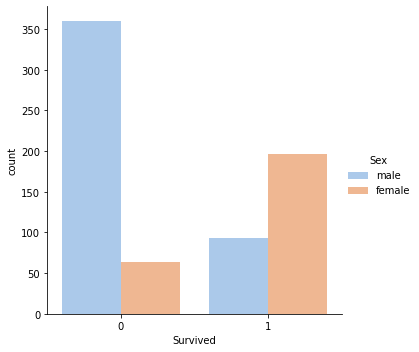

In [26]:
sns.catplot(data = trains,x = "Survived", kind = "count", hue = "Sex", palette="pastel")

assuming that 0 means didnt survive and 1 means suvived
acc to the graph given below :
1.Majority of the people who didnt survive were from Pclass = 3
2.The class of the people who survived have almost an even disturbution with the second and third Pclass and there were more suvivors frfom the 1 Pclass than individual 2 and 3 Pclass


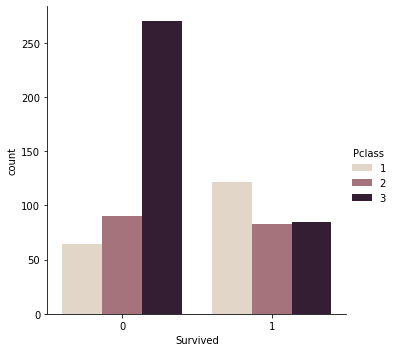

In [28]:
sns.catplot(data = trains,x = "Survived", kind = "count", hue = "Pclass", palette="ch:.25")